<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/Vanilla_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation 
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


In [0]:
num_words = 30000
maxlen = 50
test_split = 0.3

In [0]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [36]:
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')
print(X_train.shape, Y_train.shape)

(1395, 49) (1395,)


In [37]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(Y_train)

(1395, 49, 1)
[3 3 3 ... 3 3 3]


In [38]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(Y_train.shape, Y_train)

(1395, 46) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
def vanilla_rnn():
  model = Sequential()
  model.add(SimpleRNN(50, input_shape = (49, 1), return_sequences = False))
  model.add(Dense(46))
  model.add(Activation('softmax'))
  
  adam = optimizers.Adam()
  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [44]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, validation_split = 0.1, verbose = 1)
print(X_train.shape, Y_train.shape)
training_history = model.fit(X_train, Y_train, )

(1395, 49, 1) (1395, 46)
Train on 1255 samples, validate on 140 samples
Epoch 1/200
1255/1255 [==============================] - 1s 638us/step - loss: 2.9357 - acc: 0.4645 - val_loss: 1.6537 - val_acc: 0.7000
Epoch 2/200
1255/1255 [==============================] - 0s 169us/step - loss: 1.3646 - acc: 0.7163 - val_loss: 1.1671 - val_acc: 0.7000
Epoch 3/200
1255/1255 [==============================] - 0s 172us/step - loss: 1.2161 - acc: 0.7163 - val_loss: 1.1106 - val_acc: 0.7000
Epoch 4/200
1255/1255 [==============================] - 0s 189us/step - loss: 1.1922 - acc: 0.7163 - val_loss: 1.1135 - val_acc: 0.7000
Epoch 5/200
1255/1255 [==============================] - 0s 177us/step - loss: 1.1778 - acc: 0.7163 - val_loss: 1.0952 - val_acc: 0.7000
Epoch 6/200
1255/1255 [==============================] - 0s 167us/step - loss: 1.1702 - acc: 0.7163 - val_loss: 1.0969 - val_acc: 0.7000
Epoch 7/200
1255/1255 [==============================] - 0s 169us/step - loss: 1.1664 - acc: 0.7163 - val_

In [45]:
y_pred = model.predict(X_test)
y_test = np.argmax(Y_test, axis = 1)

print(accuracy_score(y_pred, y_test))

599/599 [==============================] - 0s 297us/step
0.7545909849749582


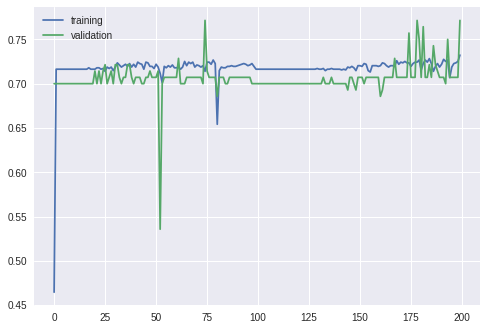

In [46]:
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.show()